In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scps

%matplotlib notebook

In [78]:
x = np.random.uniform(low=-1, high=1, size=10)
x = np.repeat(x, np.random.randint(10, 50, size=10))

<IPython.core.display.Javascript object>


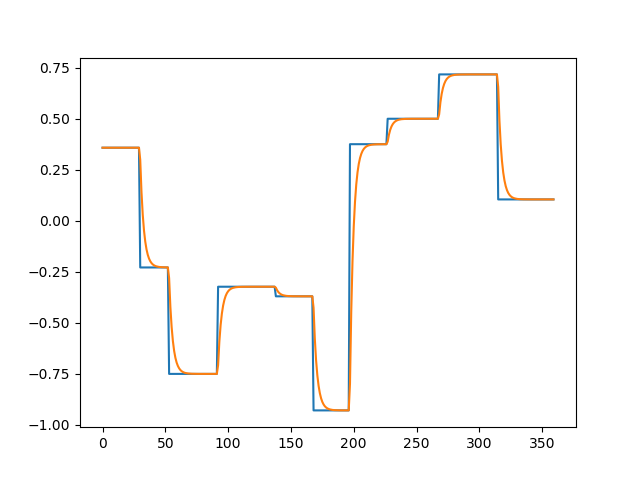

In [79]:
fig, ax = plt.subplots()
raw, = ax.plot(x)

In [80]:
s = np.zeros_like(x)
s[0] = x[0]

for t in range(1, len(x)):
    s[t] = 0.1*x[t] + 0.7*s[t-1] + 0.2*x[t-1]

smooth_1, = ax.plot(s)

In [68]:
s = b = np.zeros_like(x)
s[0] = x[0]
b[0] = x[1] - x[0]

for t in range (2, len(x)):
    s[t] = 0.1*x[t] + 0.9*(s[t-1] + b[t-1])
    b[t] = 0.5*(s[t] - s[t-1]) + 0.5*b[t-1]
    
smooth_2, = ax.plot(s)

In [70]:
s = np.zeros_like(x)
s[0] = x[0]

for t in range(1, len(x)):
    s[t] = 0.25*x[t] + 0.5*x[t-1] + 0.25*x[t-2]

smooth_3, = ax.plot(s)

\begin{align}
s_2 & = \frac{1}{4}x_2 + \frac{1}{2}x_1 + \frac{1}{4}x_0 \\
s_3 & = \frac{1}{4}x_3 + \frac{1}{2}x_2 + \frac{1}{4}x_1 = \frac{1}{4}x_3 + 2s_2
\end{align}